# Problem Statement
bayangkan kamu adalah seorang peniliti medis yang mengumpulkan data untuk sebuah penelitian. Kamu telah mengumpulkan data tentang sekumpulan pasien, dan semuanya menderita penyakit yang sama. Selama perawatannya, masing masing pasien diberikan 1 dari 5 obat, Obat A, B, C, X dan Y


Bagian dari pekerjaan Anda adalah membangun model untuk mengetahui obat mana yang mungkin sesuai untuk pasien masa depan dengan penyakit yang sama. Fitur dari dataset ini adalah Usia, Jenis Kelamin, Tekanan Darah, dan Kolesterol pasien, dan targetnya adalah obat yang direspon oleh setiap pasien.

Ini adalah contoh pengklasifikasi multikelas, dan Anda dapat menggunakan bagian pelatihan dari kumpulan data untuk membangun pohon keputusan, dan kemudian menggunakannya untuk memprediksi kelas pasien yang tidak dikenal, atau untuk meresepkan obat untuk pasien baru.

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [4]:
my_data = pd.read_csv("./drug200.csv")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
my_data.shape

(200, 6)

# Preprocessing

In [6]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.942],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.516],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972],
       [23, 'M', 'LOW', 'HIGH', 7.298],
       [32, 'F', 'HIGH', 'NORMAL', 25.974],
       [57, 'M', 'LOW', 'NORMAL', 19.128],
       [63, 'M', 'NORMAL', 'HIGH', 25.917],
       [47, 'M', 'LOW', 'NORMAL', 30.568],
       [48, 'F', 'LOW',

Seperti yang Anda ketahui, beberapa fitur dalam kumpulan data ini bersifat kategoris, seperti Jenis Kelamin atau BP. Sayangnya, Pohon Keputusan Sklearn tidak menangani variabel kategoris.


Kami masih dapat mengonversi fitur ini ke nilai numerik menggunakan pandas.get_dummies() untuk mengubah variabel kategori menjadi variabel dummy/indikator.

In [7]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [8]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.3)

In [12]:
# your code
print("X_trainsetX SHAPE:  " + str(X_train.shape))
print("y_trainsetX SHAPE:  " + str(y_train.shape))

X_trainsetX SHAPE:  (140, 5)
y_trainsetX SHAPE:  (140,)


In [26]:
drugTree = DecisionTreeClassifier( max_depth=4)
drugTree

DecisionTreeClassifier(max_depth=4)

In [27]:
drugTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [28]:
y_pred = drugTree.predict(X_test)

In [29]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.9833333333333333


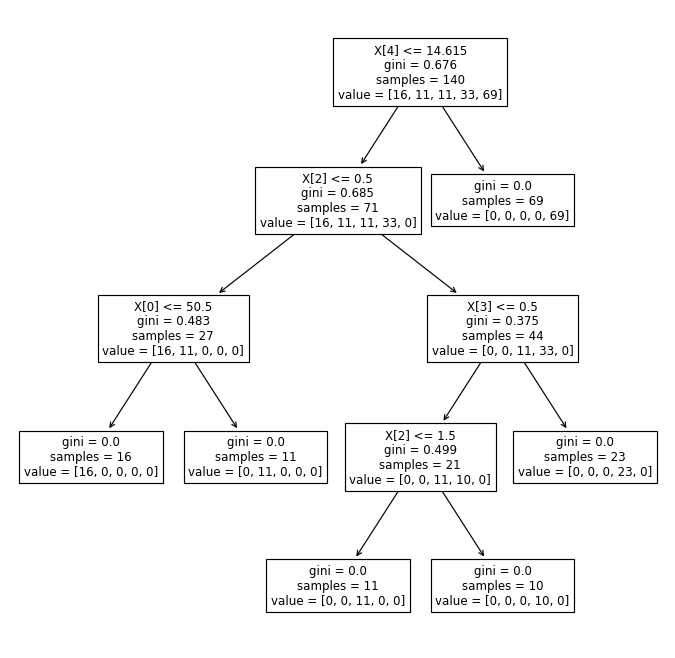

In [30]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(10,10))
tree.plot_tree(drugTree, fontsize=10)
plt.show()